In [1]:
import numpy as np  # linear algebra
import cv2 # opencv
import matplotlib.pyplot as plt # image plotting
# keras
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = "./Face Mask Dataset/Train"
test_dir = "./Face Mask Dataset/Test"
val_dir = "./Face Mask Dataset/Validation"

In [3]:
import os

# folder path
dir_path = r'./Face Mask Dataset/Test/WithMask'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 483


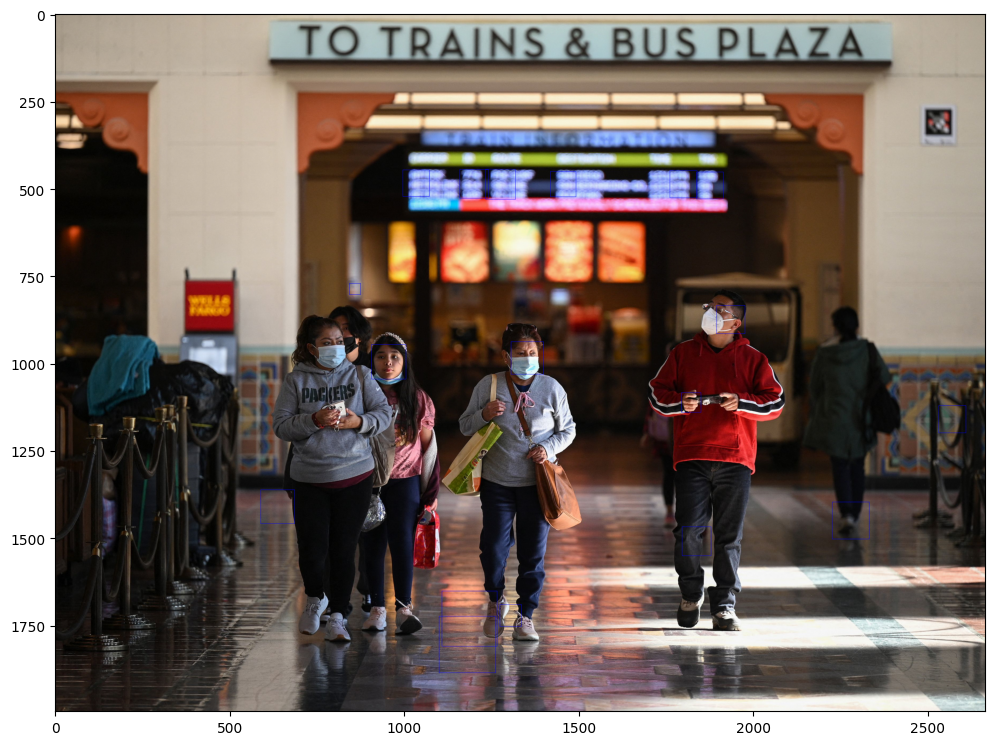

In [4]:
# Read a sample image
img = cv2.imread("./face-mask-detection/images/maksssksksss352.png")
img = cv2.imread("./test2.jpg")


# Keep a copy of coloured image
orig_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # colored output image

# Convert image to grayscale
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

# loading haarcascade_frontalface_default.xml
face_detection_model = cv2.CascadeClassifier("./haar-cascades-for-face-detection/haarcascade_frontalface_default.xml")

# detect faces in the given image
return_faces = face_detection_model.detectMultiScale(
    img, scaleFactor=1.08, minNeighbors=4
)  # returns a list of (x,y,w,h) tuples

# plotting the returned values
for (x, y, w, h) in return_faces:
    cv2.rectangle(orig_img, (x, y), (x + w, y + h), (0, 0, 255), 1)

plt.figure(figsize=(12, 12))
plt.imshow(orig_img)  # display the image

In [5]:
# Data preprocessing
# Train data
#CNN Algorithm
datagenerator = ImageDataGenerator(
    rescale=1.0 / 255, horizontal_flip=True, zoom_range=0.2, shear_range=0.2
)
train_generator = datagenerator.flow_from_directory(
    directory=train_dir, target_size=(128, 128), class_mode="categorical", batch_size=32
)

# Validation data
val_generator = datagenerator.flow_from_directory(
    directory=val_dir, target_size=(128, 128), class_mode="categorical", batch_size=32
)

# Test data
test_generator = datagenerator.flow_from_directory(
    directory=val_dir, target_size=(128, 128), class_mode="categorical", batch_size=32
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [6]:
# Initializing the VGG19 model
vgg19_model = VGG19(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

for layer in vgg19_model.layers:
    layer.trainable = False

# Initialize a sequential model
model = Sequential()
model.add(vgg19_model)
model.add(Flatten())
model.add(Dense(2, activation="sigmoid"))
model.summary()

# Compiling the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

2023-04-12 13:41:35.760732: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 13:41:35.761041: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 2)                 16386     
                                                                 
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [7]:
# Fit the model on train data along with validation data
model_history = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=len(train_generator) // 32,
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator) // 32,
)

/home/caleb/anaconda3/envs/keras/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
9/9 [==============================] - 23s 2s/step - loss: 0.6445 - accuracy: 0.6597
Epoch 2/20
9/9 [==============================] - 20s 2s/step - loss: 0.3346 - accuracy: 0.8542
Epoch 3/20
9/9 [==============================] - 21s 2s/step - loss: 0.2104 - accuracy: 0.9097
Epoch 4/20
9/9 [==============================] - 21s 2s/step - loss: 0.1706 - accuracy: 0.9306
Epoch 5/20
9/9 [==============================] - 21s 2s/step - loss: 0.1100 - accuracy: 0.9688
Epoch 6/20
9/9 [==============================] - 20s 2s/step - loss: 0.1092 - accuracy: 0.9688
Epoch 7/20
9/9 [==============================] - 21s 2s/step - loss: 0.0844 - accuracy: 0.9861
Epoch 8/20
9/9 [==============================] - 21s 2s/step - loss: 0.0654 - accuracy: 0.9896
Epoch 9/20
9/9 [==============================] - 20s 2s/step - loss: 0.0993 - accuracy: 0.9792
Epoch 10/20
9/9 [==============================] - 20s 2s/step - loss: 0.0629 - accuracy: 0.9861
Epoch 11/20
9/9 [======================

In [8]:
# Evaluate model performance on test data Using CNN
model_loss, model_acc = model.evaluate(test_generator)
print("Model has a loss of %.2f and accuracy %.2f%%" % (model_loss, model_acc*100))

25/25 [==============================] - 56s 2s/step - loss: 0.0652 - accuracy: 0.9775
Model has a loss of 0.07 and accuracy 97.75%


In [ ]:
model.save('data/saved_model.h5')

1/1 [==============================] - 0s 193ms/step


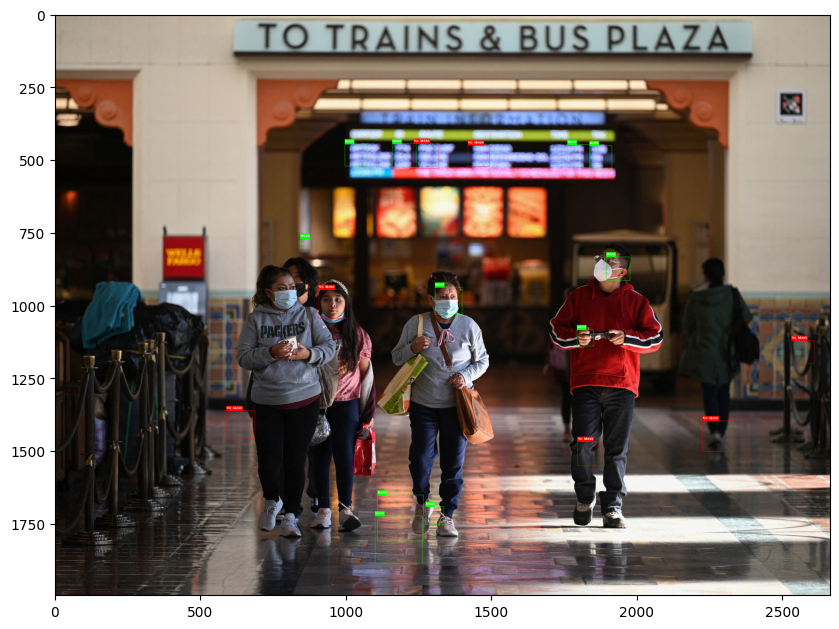

In [9]:
# label for mask detection
mask_det_label = {0: "Mask", 1: "No Mask"}
mask_det_label_colour = {0: (0, 255, 0), 1: (255, 0, 0)}
pad_y = 1  # padding for result text


main_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # colored output image

# For detected faces in the image
for i in range(len(return_faces)):
    (x, y, w, h) = return_faces[i]
    cropped_face = main_img[y : y + h, x : x + w]
    cropped_face = cv2.resize(cropped_face, (128, 128))
    cropped_face = np.reshape(cropped_face, [1, 128, 128, 3]) / 255.0
    mask_result = model.predict(cropped_face)  # make model prediction
    print_label = mask_det_label[mask_result.argmax()] # get mask/no mask based on prediction
    label_colour = mask_det_label_colour[mask_result.argmax()] # green for mask, red for no mask

    # Print result
    (t_w, t_h), _ = cv2.getTextSize(
        print_label, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1
    )  # getting the text size

    cv2.rectangle(
        main_img,
        (x, y + pad_y),
        (x + t_w, y - t_h - pad_y - 6),
        label_colour,
        -1,
    )  # draw rectangle

    cv2.putText(
        main_img,
        print_label,
        (x, y - 6),
        cv2.FONT_HERSHEY_DUPLEX,
        0.4,
        (255, 255, 255), # white
        1,
    )  # print text

    cv2.rectangle(
        main_img,
        (x, y),
        (x + w, y + h),
        label_colour,
        1,
    )  # draw bounding box on face

plt.figure(figsize=(10, 10))
plt.imshow(main_img)  # display image

### Confusion Matrix

In [10]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

batch_size = 32

filenames = val_generator.filenames
nb_samples = len(filenames)

Y_pred = model.predict(val_generator, nb_samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

print('Classification Report')
target_names = ['Mask', 'No Mask']
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

25/25 [==============================] - 57s 2s/step
Confusion Matrix
[[197 203]
 [195 205]]
Classification Report
              precision    recall  f1-score   support

        Mask       0.50      0.49      0.50       400
     No Mask       0.50      0.51      0.51       400

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800



### VGG19 Model Accuracy

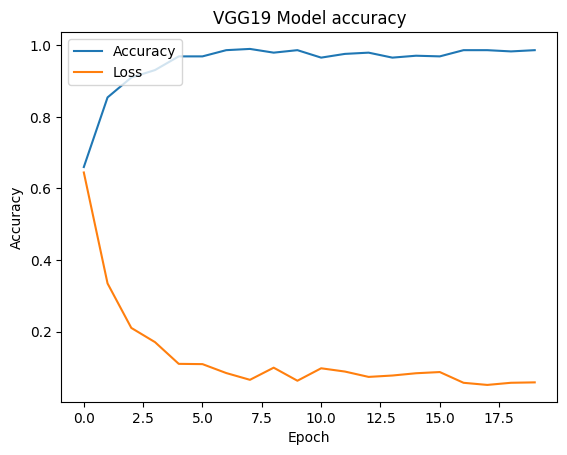

In [11]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['loss'])
plt.title('VGG19 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

### InceptionV3 Model

In [12]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Initializing the model
inception = InceptionV3(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

for layer in inception.layers:
    layer.trainable = False

# Initialize a sequential model
model = Sequential()
model.add(inception)
model.add(Flatten())
model.add(Dense(2, activation="sigmoid"))
model.summary()

# Compiling the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 16386     
                                                                 
Total params: 21,819,170
Trainable params: 16,386
Non-trainable params: 21,802,784
_________________________________________________________________


In [13]:
# Fit the model on train data along with validation data
model_history = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=len(train_generator) // 32,
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator) // 32,
)

/home/caleb/anaconda3/envs/keras/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
9/9 [==============================] - 11s 821ms/step - loss: 0.5499 - accuracy: 0.7569
Epoch 2/20
9/9 [==============================] - 8s 830ms/step - loss: 0.0985 - accuracy: 0.9757
Epoch 3/20
9/9 [==============================] - 8s 837ms/step - loss: 0.0696 - accuracy: 0.9826
Epoch 4/20
9/9 [==============================] - 7s 809ms/step - loss: 0.0792 - accuracy: 0.9861
Epoch 5/20
9/9 [==============================] - 8s 823ms/step - loss: 0.1573 - accuracy: 0.9826
Epoch 6/20
9/9 [==============================] - 7s 807ms/step - loss: 0.1146 - accuracy: 0.9792
Epoch 7/20
9/9 [==============================] - 7s 787ms/step - loss: 0.1628 - accuracy: 0.9757
Epoch 8/20
9/9 [==============================] - 7s 807ms/step - loss: 0.0360 - accuracy: 0.9826
Epoch 9/20
9/9 [==============================] - 7s 821ms/step - loss: 0.1237 - accuracy: 0.9757
Epoch 10/20
9/9 [==============================] - 7s 818ms/step - loss: 0.0876 - accuracy: 0.9826
Epoch 11/20
9/9 [=

In [14]:
# Evaluate model performance on test data Using CNN
model_loss, model_acc = model.evaluate(test_generator)
print("Model has a loss of %.2f and accuracy %.2f%%" % (model_loss, model_acc*100))

25/25 [==============================] - 21s 793ms/step - loss: 0.0348 - accuracy: 0.9925
Model has a loss of 0.03 and accuracy 99.25%


In [ ]:
model.save('data/inception_model.h5')

In [ ]:
Y_pred = model.predict(val_generator, nb_samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

print('Classification Report')
target_names = ['Mask', 'No Mask']
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

25/25 [==============================] - 20s 758ms/step
Confusion Matrix
[[200 200]
 [200 200]]
Classification Report
              precision    recall  f1-score   support

        Mask       0.50      0.50      0.50       400
     No Mask       0.50      0.50      0.50       400

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800



### InceptionV3 Model Accuracy

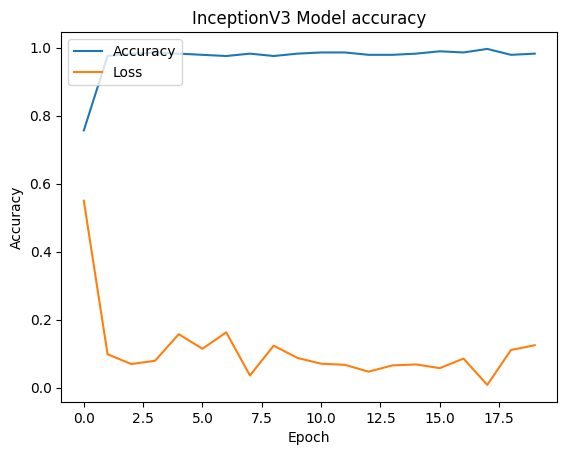

In [15]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['loss'])
plt.title('InceptionV3 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

### Hyper parameter tuning

In [16]:
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
import pandas as pd

model_history_list = []
results = []

# not enough resources for this
param_grid = {'batch_size': [16, 32, 64],
              'epochs': [10, 20, 30],
              'learning_rate': [0.001, 0.01, 0.1]}

# for batch_size in param_grid['batch_size']:
#     for epochs in param_grid['epochs']:
epochs = 20
batch_size = 32


In [18]:

for learning_rate in param_grid['learning_rate']:
    model = Sequential()
    model.add(inception)
    model.add(Flatten())
    model.add(Dense(2, activation="sigmoid"))
    
    # Compiling the model
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

    model_history_list.append(model.fit_generator(
    generator=train_generator,
    steps_per_epoch=len(train_generator) // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator) // batch_size,))

    model_loss, model_acc = model.evaluate(test_generator)

    # Append current results
    results.append({
        'Accuracy': model_acc,
        'Loss': model_loss,
        'Epochs': epochs,
        'Batch_Size': batch_size,
        'Learning_Rate': learning_rate
    })

Epoch 1/20


/home/caleb/anaconda3/envs/keras/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


9/9 [==============================] - 12s 851ms/step - loss: 1.7485 - accuracy: 0.6562
Epoch 2/20
9/9 [==============================] - 8s 844ms/step - loss: 0.3141 - accuracy: 0.9618
Epoch 3/20
9/9 [==============================] - 8s 825ms/step - loss: 0.0282 - accuracy: 0.9931
Epoch 4/20
9/9 [==============================] - 8s 838ms/step - loss: 0.0648 - accuracy: 0.9757
Epoch 5/20
9/9 [==============================] - 8s 865ms/step - loss: 0.1305 - accuracy: 0.9757
Epoch 6/20
9/9 [==============================] - 8s 841ms/step - loss: 0.1271 - accuracy: 0.9792
Epoch 7/20
9/9 [==============================] - 8s 827ms/step - loss: 0.0788 - accuracy: 0.9792
Epoch 8/20
9/9 [==============================] - 7s 798ms/step - loss: 0.1047 - accuracy: 0.9896
Epoch 9/20
9/9 [==============================] - 7s 794ms/step - loss: 0.2391 - accuracy: 0.9688
Epoch 10/20
9/9 [==============================] - 8s 837ms/step - loss: 0.0978 - accuracy: 0.9896
Epoch 11/20
9/9 [============

In [19]:
# Convert to Pandas DataFrame and sort descendingly by accuracy
results = pd.DataFrame(results)
results = results.sort_values(by='Accuracy', ascending=False)
results

,Accuracy,Loss,Epochs,Batch_Size,Learning_Rate
0,0.99250,0.032594,20,32,0.001
2,0.98500,0.026029,20,32,0.100
1,0.97875,0.082533,20,32,0.010


In [32]:
def plots():
    for i in range(len(model_history_list)):
        plt.plot(model_history_list[i].history['accuracy'])
        plt.plot(model_history_list[i].history['loss'])
        plt.title('InceptionV3 Model accuracy {}'.format(param_grid['learning_rate'][i]))
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Accuracy', 'Loss'], loc='upper left')
        plt.show()


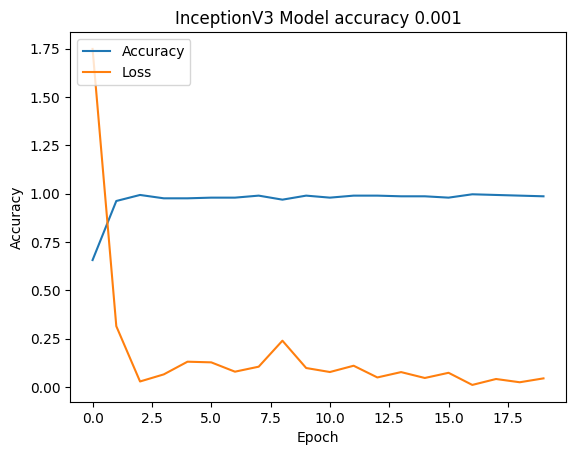

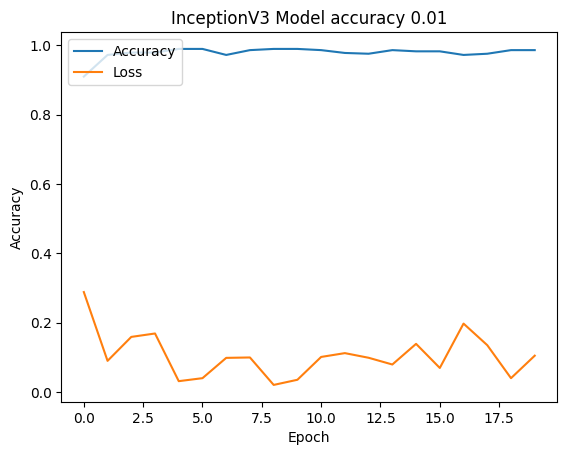

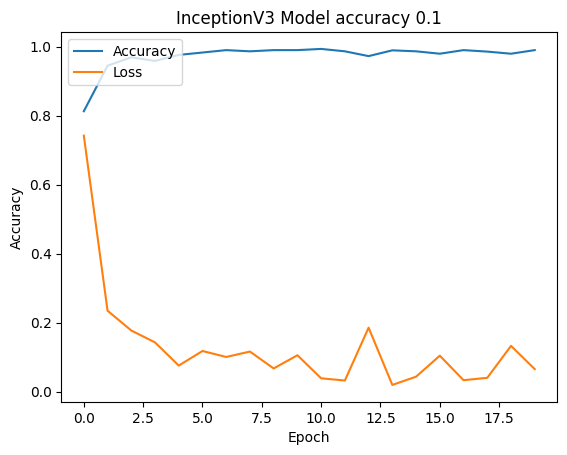

In [33]:
plots()

#### The model with the smallest learning rate had the highest accuracy, but the learning rate of 0.1 was better than the learning rate of 0.01

### Data Visualization

In [ ]:
import ipyplot
mask = ['WithMask', 'WithoutMask']
n = 184
img = cv2.imread(f"./Face Mask Dataset/Test/{mask[1]}/{n}.png")

ipyplot.plot_images([f"./Face Mask Dataset/Test/{mask[1]}/{n}.png"], img_width=128)



main_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # colored output image


cropped_face = main_img
cropped_face = cv2.resize(cropped_face, (128, 128))
cropped_face = np.reshape(cropped_face, [1, 128, 128, 3]) / 255.0
mask_result = model.predict(cropped_face)  # make model prediction
print_label = mask_det_label[mask_result.argmax()]
print(print_label)

1/1 [==============================] - 0s 257ms/step
No Mask


In [ ]:
! pip install ipyplot

In [ ]:

import ipyplot

lst = ['4', '5', '7', '8', '9']

def sample():
    
    mask = ['WithMask', 'WithoutMask']
    for m in mask:
        print(f'\t\t----{m}----')
        for i in lst:

            image_files = []
            for i in lst:
                image_files.append(f'./Face Mask Dataset/Train/{m}/{i}.png')
        ipyplot.plot_images(image_files, img_width=128)

sample()


		----WithMask----


		----WithoutMask----
